In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import glob
from math import sqrt
SPINE_COLOR = 'gray'

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'pdf',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 8,       #'text.fontsize': 8, # was 10
              'legend.fontsize': 6.5, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'lines.linewidth' : 0.4,
              'lines.markersize' : 0.4,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

linewidth=497
DPI=96
#latexify(fig_width=linewidth/DPI, fig_height=int(linewidth/2.3/DPI))
latexify(fig_width=linewidth/DPI/1.7, fig_height=int(linewidth/2.3/DPI))

In [ ]:
#PING: single experiment
#SCATTERPLOT - PING + rtt values over time
'''
for f in glob.iglob('./*1016-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'ack_delay', 'srtt', 'rtt_var', 'state'])
                                                        # KPIs FROM BEFORE 18.10.2019!
                                                        
    #dping = pd.read_csv('./20191015-1314_1hr_ping/20191015-1314_client_ping_grep', delim_whitespace=True, 
                        names = ['seconds_offset', 'ping_number', 'ping_rtt'])
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean(),
          dping.ping_rtt.mean())
    
    
    fig = dping.plot(x="ping_number", y="ping_rtt", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y1 = df.current_rtt
    fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
    y2 = df.srtt
    fig.plot(x,y2, 'y:')

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'Ping RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing+ping.pdf")
    
    axes.set_ylim([0,250])
    #axes.set_xlim([-5,605])
    plt.savefig(f+"_timing+ping_limit.pdf")
'''

In [ ]:
#SCATTERPLOT - rtt values over time
for f in glob.iglob('./*1023-*200ms*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
        
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean())
    
    fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y2 = df.srtt
    fig.plot(x,y2, 'y.')
    y1 = df.current_rtt
    fig.plot(x,y1, 'r.') # more examples = 'b:' 'k:' 'r--'

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'min RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing.pdf")
    
    axes.set_ylim([0,25])
    #axes.set_xlim([-5,1000])
    plt.savefig(f+"_timing_limit.pdf")

In [ ]:
#BOXPLOTS - rtt values (Current RTT + Smoothed RTT)
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    #delete unnecessary data
    df.drop(['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 'rtt_min', 
             'send_time', 'reception_time', 'current_ackdelay', 'rtt_var','max_ackdelay', 'state'], axis=1, inplace=True)
    
    #delete initial values
    df.drop(df.index[0], inplace=True)
    
    fig = plt.figure() #this line makes a plot for every file
    fig = df.boxplot()
    plt.xticks([1, 2], ['Current RTT', 'Smoothed RTT'])
    fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing_boxplots.pdf")

In [ ]:
#SCATTERPLOT - congestion window
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    fig = df.plot(x="seconds_offset", y="cwin", marker=",", markersize="0.01", color="DarkBlue", linestyle="None")

    axes = plt.gca()
    #axes.set_ylim([0,20])
    #axes.set_xlim([-5,605])
    axes.get_legend().remove()
    
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Congestion Window')
    plt.tight_layout()
    plt.savefig(f+"_cwin.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_cwin_ylog.pdf")

In [ ]:
#SCATTERPLOT retransmissions over time
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.state.count())
    print(num_retrans, "\n")
    
    fig = df.plot(x="seconds_offset", y="state", marker="x", markersize="0.1", color="DarkBlue", linestyle="None")
    
    fig.text(df['seconds_offset'].max()*0.75, 0.95, num_retrans, horizontalalignment='center', verticalalignment='center')
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Retransmission=1')
    plt.tight_layout()
    plt.savefig(f+"_retransOverTime.pdf")


In [ ]:
# CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(0.,1.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_cdf_retransTimeBetween.pdf")


In [ ]:
# COMPLEMENTARY CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(1.,0.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_ccdf_retransTimeBetween.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_ccdf_retransTimeBetween_ylog.pdf")
    
    axes = plt.gca() 
    axes.set_xlim([0,100])
    fig.text(60, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')
    plt.savefig(f+"_ccdf_retransTimeBetween_yloglim.pdf")

In [ ]:
#SCATTERPLOT - rtt values over time
#COMPARISON to TIMING VALUES
for f in glob.iglob('./*1023-*200*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    #calculate the comparison value
    df['recept_send'] = df.reception_time - df.send_time
    df['deviation'] = df.recept_send - df.current_rtt
    df = df[df.state == 15] #only values after successful start are comparable (earlier, there is no send or reception time set)
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    df.recept_send = df.recept_send.apply(lambda x: x / 1000)
    df.deviation = df.deviation.apply(lambda x: x / 1000)
    df.current_ackdelay = df.current_ackdelay.apply(lambda x: x / 1000)
    df.max_ackdelay = df.max_ackdelay.apply(lambda x: x / 1000)
    
    title=f
    print(f)
    
    print('Current RTT mean: ' + str(df.current_rtt.mean()) + '\n',
          'SRTT mean: ' + str(df.srtt.mean()) + '\n',
         'Calculated reception-send mean: ' + str(df.recept_send.mean()) + '\n',
         'Deviation mean: ' + str(df.deviation.mean()) + '\n')
    
    standard = 0; #1 = standard plot over time
                  #0 = deviation plotted over time
    
    if(standard):
        fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        y1 = df.current_rtt
        fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
        y2 = df.recept_send
        fig.plot(x,y2, 'y:')

        axes = plt.gca()
        fig.legend(['Current RTT', 'recept minus send', 'min RTT'])
        fig.set_xlabel('Runtime (seconds)')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-comparison.pdf")
    
    #Plotting only deviation values
    else:
        df['deviation'] = df['deviation'].replace(0.0, np.nan) #set all 0.0 to NaN -> not plotted
        df.dropna(inplace=True)
        print(df[['seconds_offset', 'current_rtt', 'recept_send', 
                  'deviation', 'current_ackdelay', 'max_ackdelay']].to_string(index=False))

        fig = df.plot(x="seconds_offset", y="deviation", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        
        num_deviations = 'Differences = ' + str(df.deviation.count())
        print(num_deviations, "\n")
        #fig.text(df.seconds_offset.max()*0.9, df.deviation.max()*0.9, num_deviations, horizontalalignment='center', verticalalignment='center')

        axes = plt.gca()
        fig.legend(['Deviation'])
        fig.set_xlabel('Runtime (seconds)  [' + num_deviations + ']')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-deviation_cleaned.pdf")

.\20191029-0810_500ms-5min_pcap2_eth\client_filter_pcap
     frame  app_rtt  clientrtt1  client2server  server2client  serverprocessingtime
0        1    2.442    2.417088       1.307011       0.956059              0.154018
1        4    2.578    2.549887       1.222849       1.051903              0.275135
2        7    2.878    2.799034       1.358986       1.101971              0.338078
3       10    2.762    2.736807       1.386881       1.057863              0.292063
4       13    2.630    2.604961       1.358032       0.978947              0.267982
5       16    2.606    2.580881       1.290083       0.953913              0.336885
6       19    2.426    2.391100       1.184940       1.055002              0.151157
7       22    2.595    2.563000       1.343012       1.025915              0.194073
8       25    2.592    2.550840       1.170874       1.185894              0.194073
9       28    2.693    2.665997       1.169920       1.183033              0.313044
10      31    2.413 

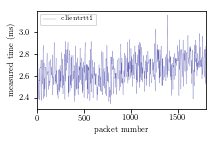

In [9]:
#SINGLE EXPERIMENT
# Compute the time from pcap files
# Comparison with current_rtt from application

for f in glob.iglob('./*1029-08*/*client_filter_pcap', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, float_precision='round_trip', names = ['seconds_offset', 'framenumber', 'datasize']) 
                                                        #extraction of PCAP: update from 28.10.19
    title=f
    print(f)
    
    dfserver = pd.read_csv('./20191029-0810_500ms-5min_pcap2_eth/server_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])
    
    #TODO: Cut firstKPIs short to cover only the same packets as in filtered PCAP
    dfcomp = pd.read_csv('./20191029-0810_500ms-5min_pcap2_eth/firstKPIs', delim_whitespace=True, 
                        names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                 'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                 'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
    
    #set the indices
    i=0
    j=1
    k=2
    
    rtt1 = []
    rtt2 = []
    frameNumber = []
    frameNumber1 = []
    frameNumber2 = []
    dataSize1 = []
    dataSize2 = []
    
    
    client2server = []
    server2client = []
    serverprocessingtime = []
    
    num_packets = df.seconds_offset.count()/3

    #compute the pcap rtt's: first reply - request = rtt1, 
    #                        second reply - request = rtt2,
    #                        server_receive - client_sent
    for x in range(num_packets.astype(int)):
        frameNumber.append(df.at[i, 'framenumber'])
        rtt1.append(df.at[j, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        frameNumber1.append(df.at[j, 'framenumber'])
        dataSize1.append(df.at[j, 'datasize'])
        rtt2.append(df.at[k, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        frameNumber2.append(df.at[k, 'framenumber'])
        dataSize2.append(df.at[k, 'datasize'])
        
        client2server.append(dfserver.at[i, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        serverprocessingtime.append(dfserver.at[j, 'seconds_offset'] - dfserver.at[i, 'seconds_offset'])
        server2client.append(df.at[j, 'seconds_offset'] - dfserver.at[j, 'seconds_offset'])
        
        i=i+3
        j=j+3
        k=k+3
        
    
    df2 = pd.DataFrame()
    df2['frame'] = frameNumber
    df2['app_rtt'] = dfcomp['current_rtt']
    df2['clientrtt1'] = rtt1
    #df2['frame+1'] = frameNumber1
    #df2['size1'] = dataSize1
    #df2['client_rtt2'] = rtt2
    #df2['frame+2'] = frameNumber2
    #df2['size2'] = dataSize2
    
    df2['client2server'] = client2server
    df2['server2client'] = server2client
    df2['serverprocessingtime'] = serverprocessingtime
    
    df2.app_rtt = df2.app_rtt.apply(lambda x: x / 1000) #from us to ms
    df2.clientrtt1 = df2.clientrtt1.apply(lambda x: x * 1000) #from s to ms
    #df2.client_rtt2 = df2.client_rtt2.apply(lambda x: x * 1000)
    df2.client2server = df2.client2server.apply(lambda x: x * 1000)
    df2.server2client = df2.server2client.apply(lambda x: x * 1000)
    df2.serverprocessingtime = df2.serverprocessingtime.apply(lambda x: x * 1000)
    
    print(df2.to_string())
    
    fig = df2.plot(x="frame", y="clientrtt1", kind='line', color="DarkBlue", linestyle=':')
    
    
    fig.set_xlabel('packet number')
    fig.set_ylabel('measured time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_analysis.pdf")

In [ ]:
#iperf UDP

dfserver = pd.read_csv('./iperf_tests/20191028-1019_udp/server_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])
dfclient = pd.read_csv('./iperf_tests/20191028-1019_udp/client_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])

client2server = []
clienttime = []
client_firstoffset = dfclient.at[0, 'seconds_offset']
servertime = []

for x in range(dfclient.seconds_offset.count()):
    client2server.append(dfserver.at[x, 'seconds_offset'] - dfclient.at[x, 'seconds_offset'])
    #clienttime.append(dfclient.at[x, 'seconds_offset'] - client_firstoffset)
    #servertime.append(dfserver.at[x, 'seconds_offset'] - client_firstoffset)
    

df = pd.DataFrame()
#df['client_time'] = clienttime
#df['server_time'] = servertime
df['client2server'] = client2server

df.client2server = df.client2server.apply(lambda x: x * 1000) #from s to ms


print(df.to_string())


#fig = df.plot()

#fig.set_xlabel('index')
#fig.set_ylabel('measured time (ms)')
#plt.tight_layout()
#plt.savefig("./iperf_tests/20191028-1019_udp/client_filter_pcap_analysis.pdf")

In [ ]:
#iperf TCP

dfserver = pd.read_csv('./iperf_tests/20191029-1136_tcp/server_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])
dfclient = pd.read_csv('./iperf_tests/20191029-1136_tcp/client_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])

client2server = []
clienttime = []
client_firstoffset = dfclient.at[0, 'seconds_offset']
servertime = []

for x in range(dfclient.seconds_offset.count()):
    client2server.append(dfserver.at[x, 'seconds_offset'] - dfclient.at[x, 'seconds_offset'])
    #clienttime.append(dfclient.at[x, 'seconds_offset'] - client_firstoffset)
    #servertime.append(dfserver.at[x, 'seconds_offset'] - client_firstoffset)
    

df = pd.DataFrame()
#df['client_time'] = clienttime
#df['server_time'] = servertime
df['client2server'] = client2server

df.client2server = df.client2server.apply(lambda x: x * 1000) #from s to ms


print(df.to_string())


#fig = df.plot()

#fig.set_xlabel('index')
#fig.set_ylabel('measured time (ms)')
#plt.tight_layout()
#plt.savefig("./iperf_tests/20191028-1019_udp/client_filter_pcap_analysis.pdf")